<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [1]:
import warnings

import numpy as np
import pandas as pd
from dask import dataframe as dd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\ML_approach\\images\\"
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\"

warnings.filterwarnings("ignore")

c:\Users\MIST LAB\anaconda3\envs\dl_env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\MIST LAB\anaconda3\envs\dl_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\MIST LAB\anaconda3\envs\dl_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

In [3]:
fileName = "cleaned_DrDoS_DNS.csv"

initial_df = readCSV_Function(filePath+fileName)
initial_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
initial_df.drop(initial_df[initial_df.Label == "WebDDoS"].index, inplace=True,errors='ignore')
initial_df = shuffle(initial_df)
print(initial_df.shape)
initial_df['Label'].value_counts()

(73886, 78)


DrDoS_DNS    71882
BENIGN        2004
Name: Label, dtype: int64

In [4]:
features_filepath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
features_df = readCSV_Function(features_filepath)
features_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
feature_list = list(features_df["Names"])
feature_list.remove("Label")
feature_list.append("Label")

df = initial_df[feature_list]

weights = df['Label'].value_counts()/len(df)
y = df['Label']
X = df.drop(columns='Label')

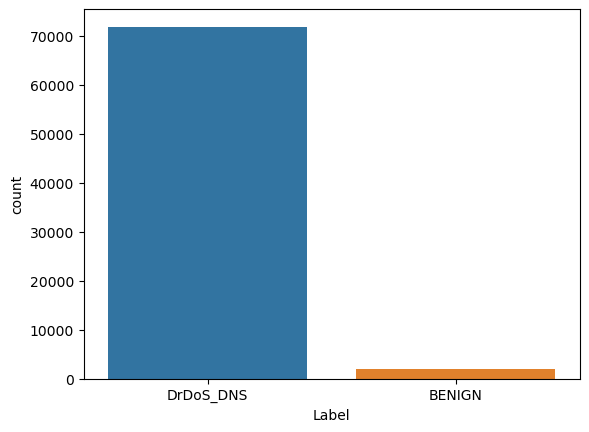

In [5]:
imgName = "initial_DNS.png"
ax  = sns.countplot(x=y, label="Count")
plt.savefig(imgPath + imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Random Under sampling
</h3></center>

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

SEED = 23
rand_undersample = RandomUnderSampler(sampling_strategy='not minority',random_state=SEED)
X_resampled_rand, y_resampled_rand = rand_undersample.fit_resample(X, y)

counter = Counter(y_resampled_rand)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_rand) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

dl_file_path = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\For_2_step\\individual_csv_files\\"
dl_file_name = "DNS_Dataset_Random_Undersampled.csv"

data_res = np.concatenate((X_resampled_rand, np.vstack(y_resampled_rand)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
data_res.to_csv(dl_file_path+dl_file_name,index=False,header=True)

Label:BENIGN  n:2004  50.0%
Label:DrDoS_DNS  n:2004  50.0%


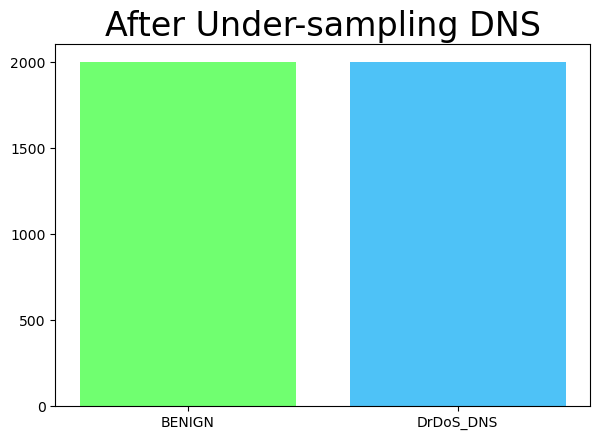

In [7]:
imgName = "DNS_Undersampled_by_Random_Sampling.png"
colors = ["#33FF33","#03A9F4"]

# plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 20
plt.title("After Under-sampling DNS")
plt.tight_layout()
plt.savefig(imgPath+imgName)